In [1]:
from files.utils.constants import *
from files.utils.utility_functions import *
from files.utils.dataset_creator import *
from files.NeuralRansac import *

In [2]:
params = {
    'npoints': 500,
    'of': 0.2,
    'nmodels': 2,
    'mss': 20,
}

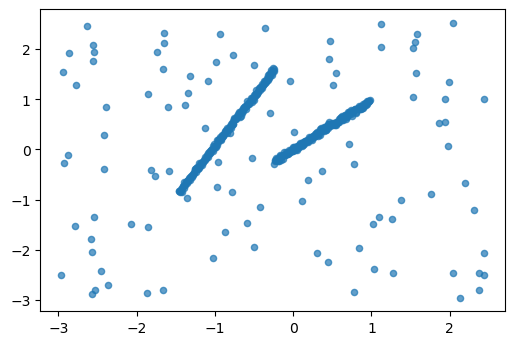

In [3]:
ds, gt = create_dataset_line(params["npoints"], m_s=[1, 2], centers=[(2, 2), (-2, 2)], outliers_fraction=params["of"])
ds = normalize_points(ds)
plot(ds, new_fig=True, dpi=100)

--------------------------------------------------
Building RanSac models
Iteration 1/30: [=>.............................] (3%) ETA: 0:00:00.133338 Len best cons: 99

/opt/anaconda3/envs/torch/lib/python3.8/site-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


Iteration 30/30: [==============================] (100%) ETA: 0:00:03.425779 Len best cons: 1799
--------------------------------------------------
Building preference matrix
--------------------------------------------------
Clustering of preference matrix
--------------------------------------------------
Done


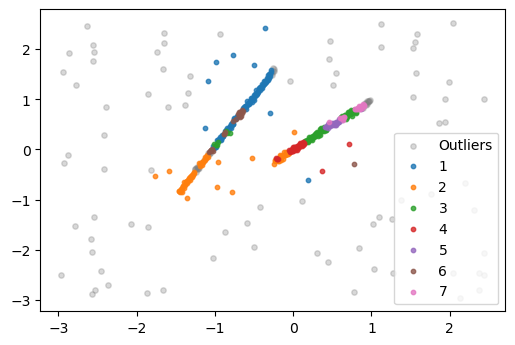

In [4]:
somransac = NeuralRansac(data=ds, model_name=SOM, verbose=1, v=NEW_INLIERS)
somnew_prefs, somcluss = somransac.t_linkage(mss=params["mss"])
plot_clusters(somcluss, ds)

--------------------------------------------------
Building RanSac models
Iteration 30/30: [==============================] (100%) ETA: 0:00:12.106711 Len best cons: 3922
--------------------------------------------------
Building preference matrix
--------------------------------------------------
Clustering of preference matrix
--------------------------------------------------
Done


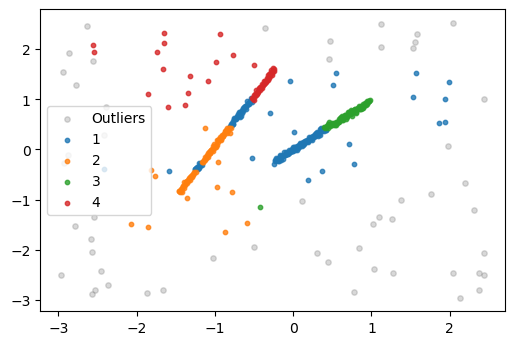

In [5]:
neuralransac = NeuralRansac(data=ds, model_name=NN, verbose=1)
new_prefs, cluss = neuralransac.t_linkage(mss=params["mss"])
plot_clusters(cluss, ds)

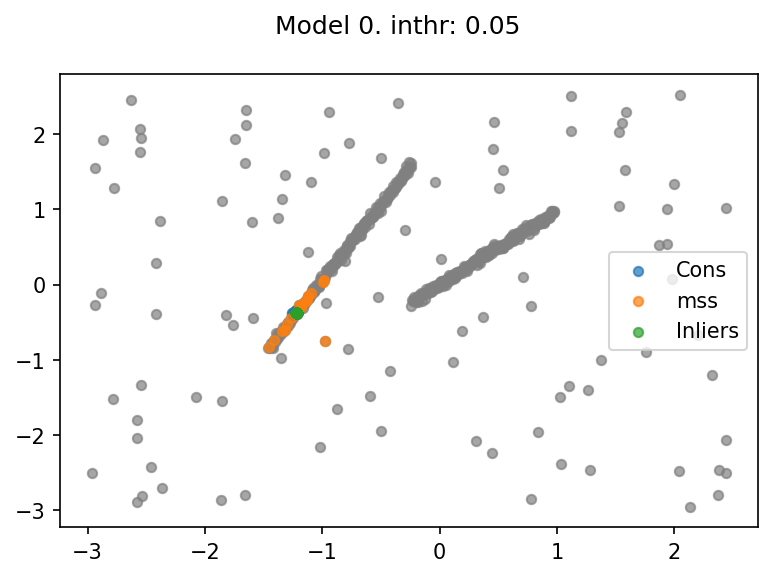

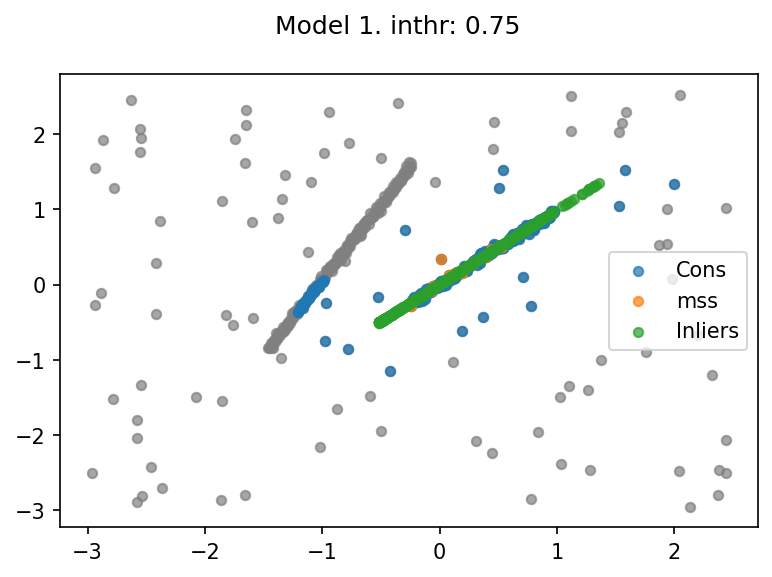

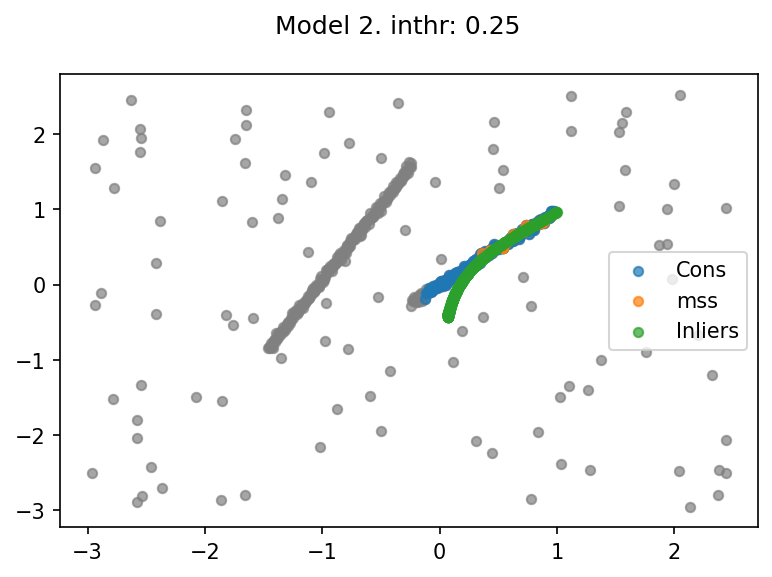

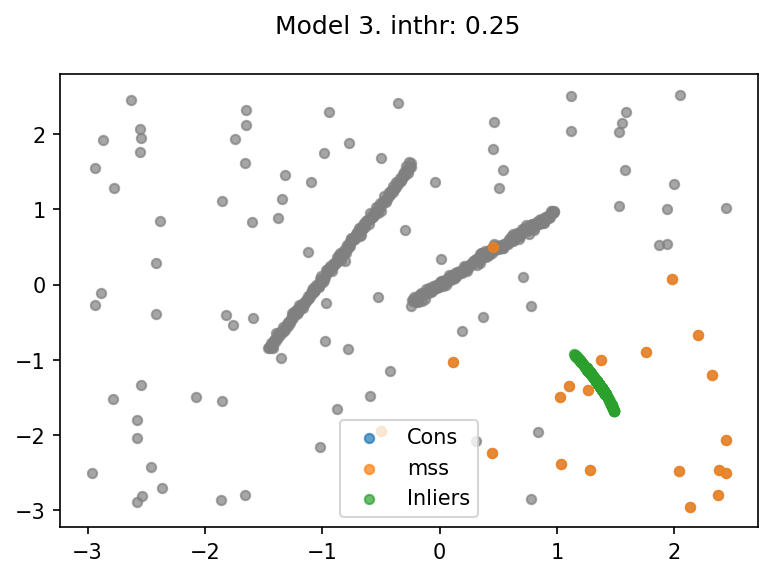

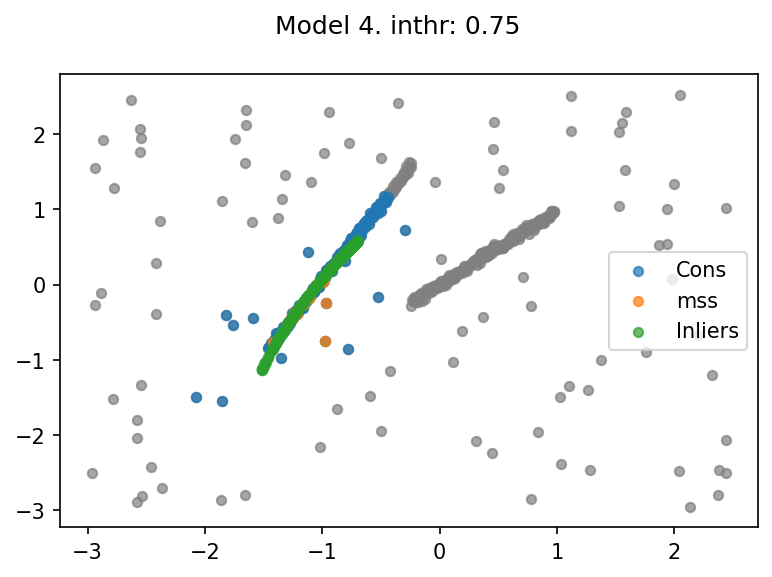

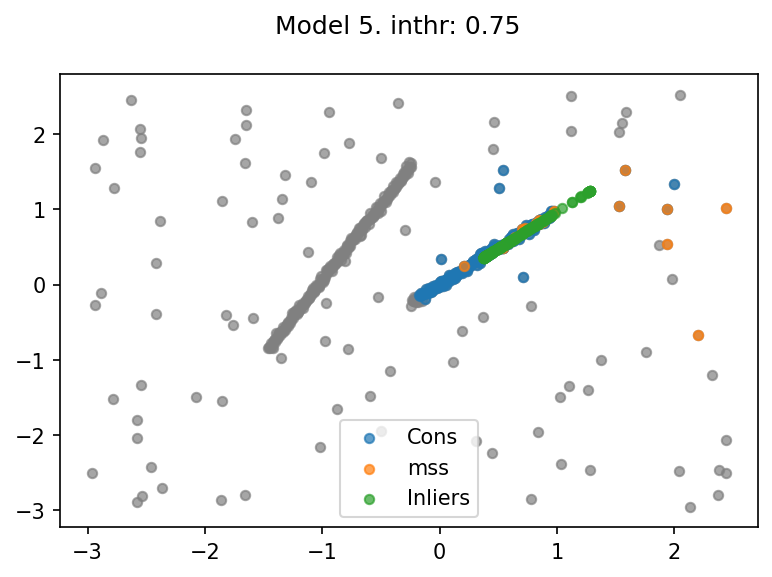

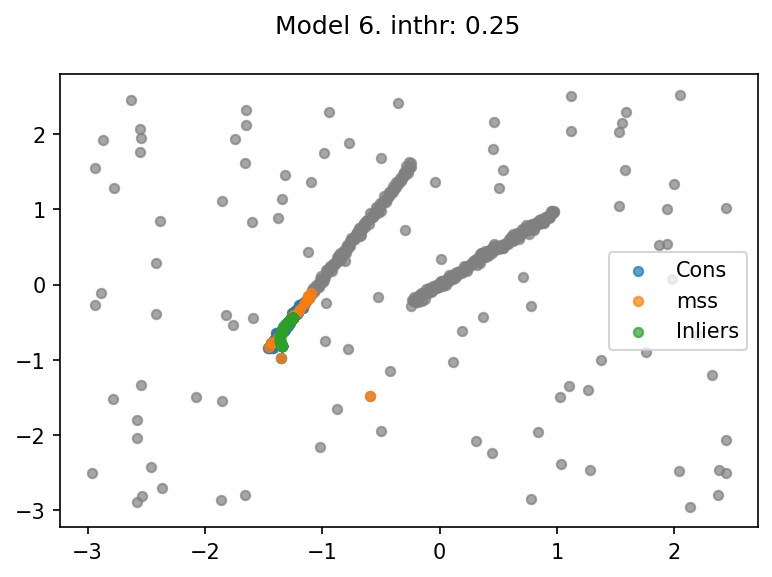

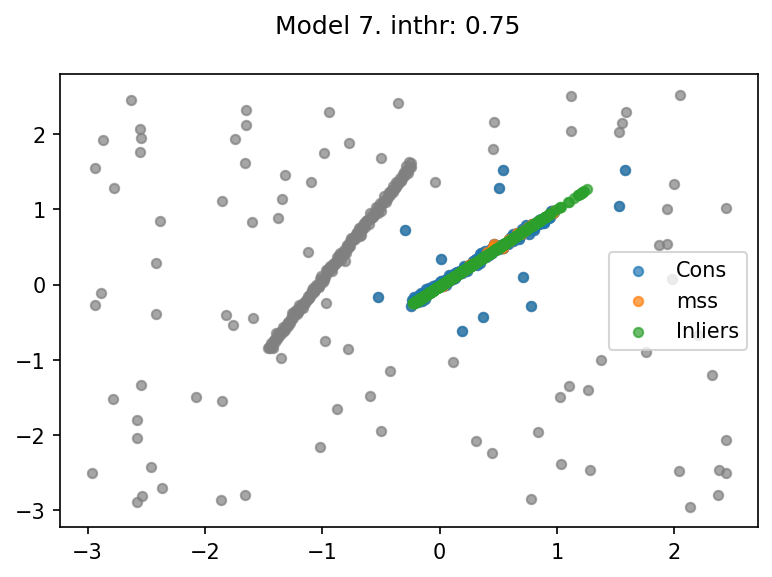

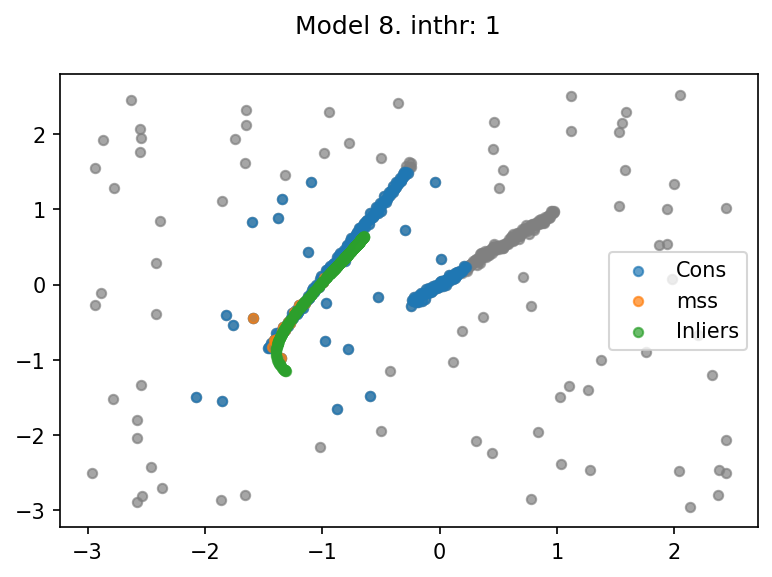

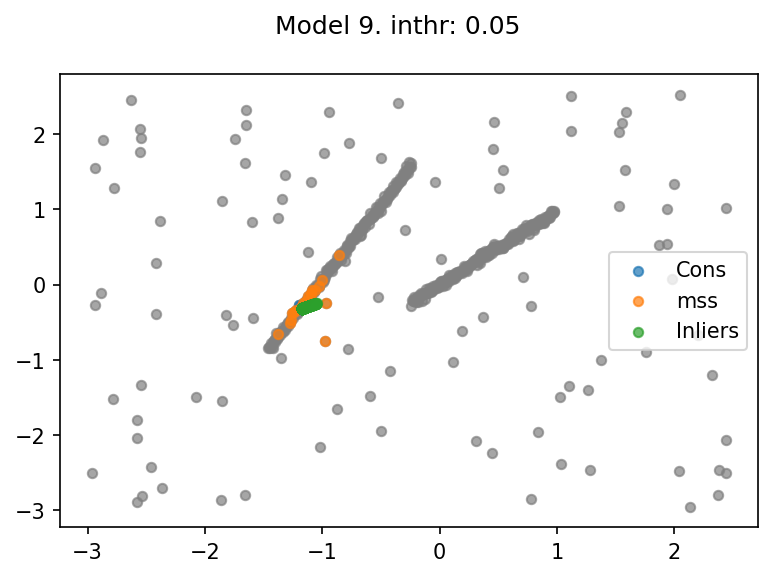

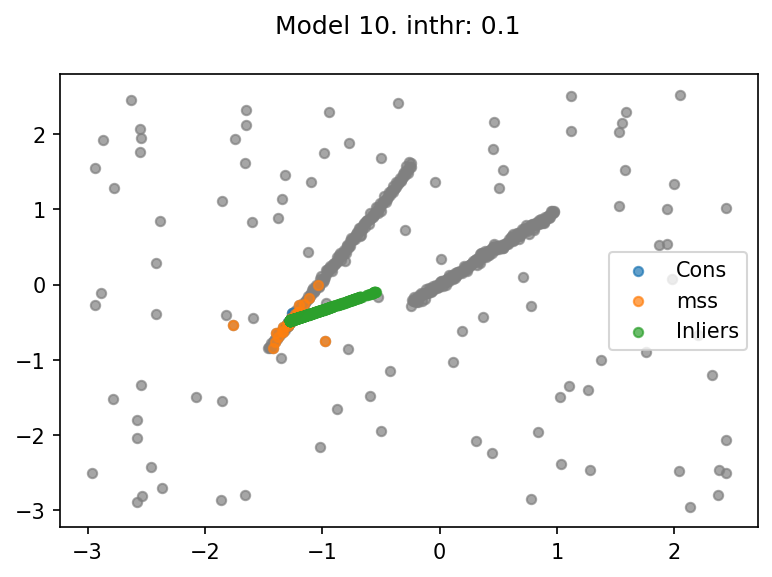

In [6]:
for i, (model, (cons, mss, inthr)) in enumerate(neuralransac.models.items()):
    if i>10: break
    plot(ds, new_fig=True, title=f"Model {i}. inthr: {inthr}", c="gray")
    plot(cons, label="Cons")
    plot(mss, label="mss")
    plot(model.predict(ds), label="Inliers")